In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns

In [2]:
import matplotlib.colors as plt_colors

In [3]:
import phik

In [4]:
def plot_correlation_matrix(
    matrix_colors:np.ndarray,
    x_labels:list,
    y_labels:list,
    fig,
    ax,
    pdf_file_name:str='',
    title:str='correlation',
    vmin:float=-1,
    vmax:float=1,
    color_map:str='RdYlGn',
    x_label:str='',
    y_label:str='',
    top:int=20,
    matrix_numbers:np.ndarray=None,
    print_both_numbers:bool=True,
    usetex:bool=False,
    identity_layout:bool=True,
    fontsize_factor:float=1
) -> None:
    """Create and plot correlation matrix.

    Copied with permission from the eskapade package (pip install eskapade)

    :param matrix_colors: input correlation matrix
    :param list x_labels: Labels for histogram x-axis bins
    :param list y_labels: Labels for histogram y-axis bins
    :param str pdf_file_name: if set, will store the plot in a pdf file
    :param str title: if set, title of the plot
    :param float vmin: minimum value of color legend (default is -1)
    :param float vmax: maximum value of color legend (default is +1)
    :param str x_label: Label for histogram x-axis
    :param str y_label: Label for histogram y-axis
    :param str color_map: color map passed to matplotlib pcolormesh. (default is 'RdYlGn')
    :param int top: only print the top 20 characters of x-labels and y-labels. (default is 20)
    :param matrix_numbers: input matrix used for plotting numbers. (default it matrix_colors)
    :param identity_layout: Plot diagonal from right top to bottom left (True) or bottom left to top right (False)
    """
    if not isinstance(matrix_colors, np.ndarray):
        raise TypeError('matrix_colors is not a numpy array.')
    
    # basic matrix checks
    assert (matrix_colors.shape[0] == len(y_labels)) or (matrix_colors.shape[0] + 1 == len(y_labels)), \
        'matrix_colors shape inconsistent with number of y-labels'
    assert (matrix_colors.shape[1] == len(x_labels)) or (matrix_colors.shape[1] + 1 == len(x_labels)), \
        'matrix_colors shape inconsistent with number of x-labels'
    if matrix_numbers is None:
        matrix_numbers = matrix_colors
        print_both_numbers = False  # only one set of numbers possible
    else:
        assert matrix_numbers.shape[0] == len(y_labels), 'matrix_numbers shape inconsistent with number of y-labels'
        assert matrix_numbers.shape[1] == len(x_labels), 'matrix_numbers shape inconsistent with number of x-labels'

    if identity_layout:
        matrix_colors = np.array([a[::-1] for a in matrix_colors])
        x_labels = x_labels[::-1]
        if matrix_numbers is not None:
            matrix_numbers = np.array([a[::-1] for a in matrix_numbers])

    plt.rc('text', usetex=usetex)

    # cmap = 'RdYlGn' #'YlGn'
    norm = plt_colors.Normalize(vmin=vmin, vmax=vmax)
    img = ax.pcolormesh(matrix_colors, cmap=color_map, edgecolor='w', linewidth=1, norm=norm)

    # set x-axis properties
    def tick(lab):
        """Get tick."""
        if isinstance(lab, (float, int)):
            lab = 'NaN' if np.isnan(lab) else '{0:.0f}'.format(lab)
        lab = str(lab)
        if len(lab) > top:
            lab = lab[:17] + '...'
        return lab

    # reduce default fontsizes in case too many labels?
    # nlabs = max(len(y_labels), len(x_labels))

    # axis ticks and tick labels
    if len(x_labels) == matrix_colors.shape[1] + 1:
        ax.set_xticks(np.arange(len(x_labels)))
    else:
        ax.set_xticks(np.arange(len(x_labels)) + 0.5)
    ax.set_xticklabels([tick(lab) for lab in x_labels], rotation='vertical', fontsize=10 * fontsize_factor)

    if len(y_labels) == matrix_colors.shape[0] + 1:
        ax.set_yticks(np.arange(len(y_labels)))
    else:
        ax.set_yticks(np.arange(len(y_labels)) + 0.5)
    ax.set_yticklabels([tick(lab) for lab in y_labels], rotation='horizontal', fontsize=10 * fontsize_factor)

    # Turn ticks off in case no labels are provided
    if len(x_labels)==1 and len(x_labels[0]) == 0:
        plt.tick_params(
            axis='x',  # changes apply to the x-axis
            which='both',  # both major and minor ticks are affected
            bottom=False,  # ticks along the bottom edge are off
            top=False,  # ticks along the top edge are off
            labelbottom=False)
    if len(y_labels)==1 and len(y_labels[0]) == 0:
        plt.tick_params(
            axis='y',  # changes apply to the x-axis
            which='both',  # both major and minor ticks are affected
            left=False,  # ticks along the bottom edge are off
            right=False,  # ticks along the top edge are off
            labelbottom=False)

    # make plot look pretty
    ax.set_title(title, fontsize=14 * fontsize_factor)
    if x_label:
        ax.set_xlabel(x_label, fontsize=12 * fontsize_factor)
    if y_label:
        ax.set_ylabel(y_label, fontsize=12 * fontsize_factor)

    # annotate with correlation values
    numbers_set = [matrix_numbers] if not print_both_numbers else [matrix_numbers, matrix_colors]
    for i in range(matrix_numbers.shape[1]):
        for j in range(matrix_numbers.shape[0]):
            point_color = float(matrix_colors[j][i])
            white_cond = (point_color < 0.7 * vmin) or (point_color >= 0.7 * vmax) or np.isnan(point_color)
            y_offset = 0.5
            for m, matrix in enumerate(numbers_set):
                if print_both_numbers:
                    if m == 0:
                        y_offset = 0.7
                    elif m == 1:
                        y_offset = 0.25
                point = float(matrix[j][i])
                label = 'NaN' if np.isnan(point) else '{0:.2f}'.format(point)
                color = 'w' if white_cond else 'k'
                ax.annotate(label, xy=(i + 0.5, j + y_offset), color=color, horizontalalignment='center',
                            verticalalignment='center', fontsize=10 * fontsize_factor)

    plt.tight_layout()


In [5]:
#plt.style.use('seaborn')
plt.rcParams['text.color'] = 'black'
plt.rcParams['figure.max_open_warning'] = 0
colors = [i['color'] for i in plt.rcParams['axes.prop_cycle']]
markers = ['o', 's', 'p', 'x', '^', '+', '*', '<', 'D', 'h', '>']
%matplotlib inline

In [6]:
plt.style.use('seaborn')

## Data set -- Fake insurance set

In [7]:
df = pd.read_csv('fake_insurance_data.csv.gz')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   car_color   2000 non-null   object 
 1   driver_age  2000 non-null   float64
 2   area        2000 non-null   object 
 3   mileage     2000 non-null   float64
 4   car_size    2000 non-null   object 
dtypes: float64(2), object(3)
memory usage: 78.2+ KB


In [8]:
df.head()

,car_color,driver_age,area,mileage,car_size
0,black,26.377219,suburbs,156806.288398,XXL
1,black,58.976840,suburbs,74400.323559,XL
2,multicolor,55.744988,downtown,267856.748015,XXL
3,metalic,57.629139,downtown,259028.249060,XXL
4,green,21.490637,downtown,110712.216080,XL


In [9]:
N, M = df.shape

In [10]:
num_cols = ['driver_age', 'mileage']
cat_cols = ['car_color', 'area', 'car_size']
rot_labels = ['car_color', 'area']

In [11]:
subset_cols = ['driver_age', 'mileage', 'car_size']

In [12]:
ss = df.loc[:, subset_cols]

N, M = ss.shape

### Dataset plot

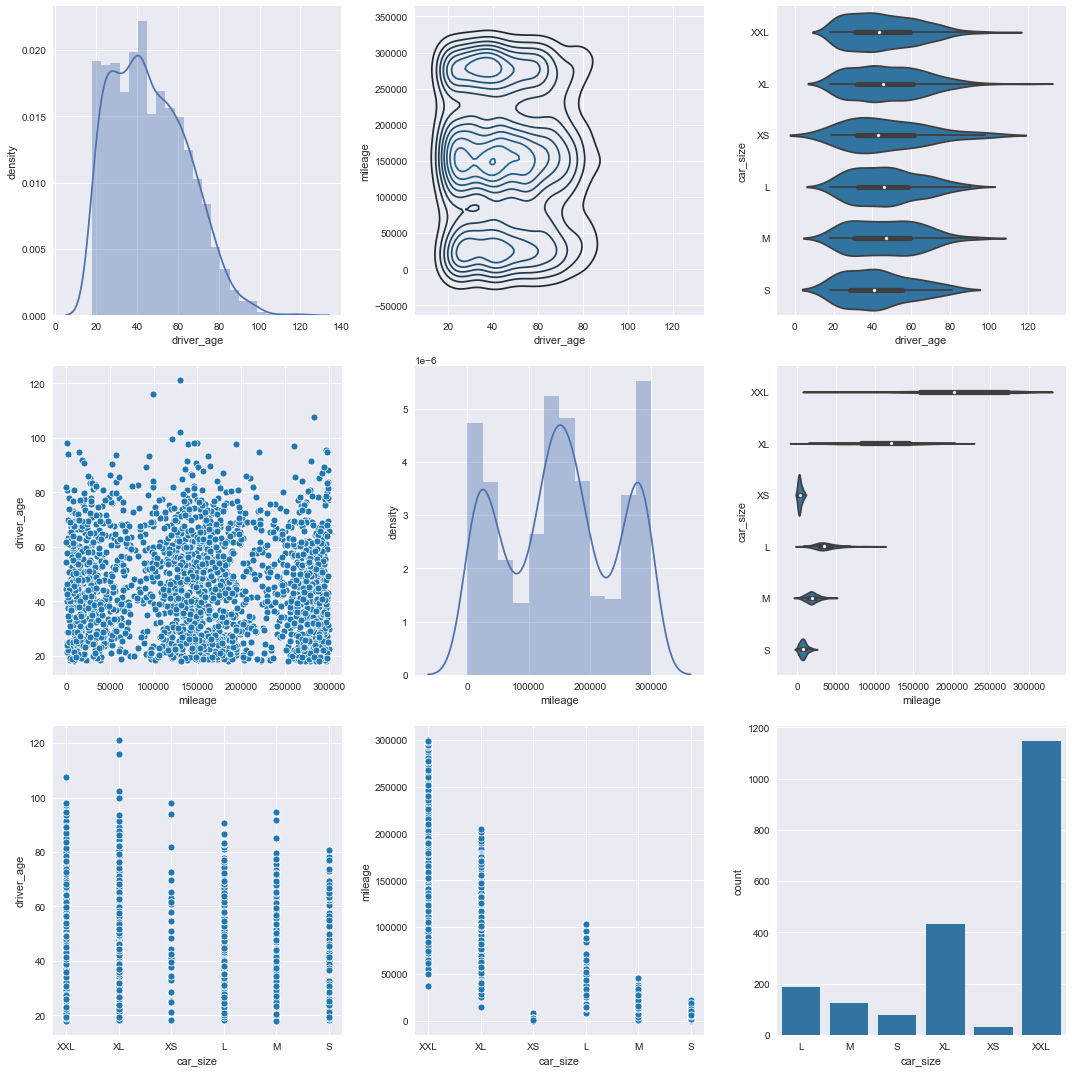

In [13]:
i_set = set([i for i in range(M)])
fig, axs = plt.subplots(nrows=M, ncols=M, figsize=(15, 15))

for i, c in enumerate(ss.columns):
    if c in num_cols:
        sns.distplot(ss[c], ax=axs[i, i], bins='auto')
        axs[i, i].set_ylabel('density')
    elif c in cat_cols:
        gb = df.groupby(by=c)[c].count().to_frame().rename({c: 'count'}, axis=1)
        sns.barplot(data=gb, x=gb.index, y='count', ax=axs[i, i], color=colors[0])
        if c in rot_labels:
            axs[i, i].set_xticklabels(gb.index, rotation=20)
    else:
        ValueError('Column not numerical or categorical')
    for ci in (i_set - {i}):
        cc = ss.columns[ci]
        if ci > i:
            if (c in cat_cols) or (cc in cat_cols):
                sns.violinplot(data=df, x=c, y=cc, ax=axs[i, ci], color=colors[0])
            else:
                sns.kdeplot(data=df[c], data2=df[cc], ax=axs[i, ci], color=colors[0])
        else:
            sns.scatterplot(data=df, x=c, y=cc, ax=axs[i, ci], color=colors[0])
plt.tight_layout()

## Process data

In [14]:
data_types = {'severity': 'interval',
             'driver_age':'interval',
             'satisfaction':'ordinal',
             'mileage':'interval',
             'car_size':'ordinal',
             'car_use':'ordinal',
             'car_color':'categorical',
             'area':'categorical'}

interval_cols = [col for col, v in data_types.items() if v=='interval' and col in df.columns]
interval_cols
num_cols_idx = [i for i, col in enumerate(df.columns) if data_types[col] == 'interval']
cat_cols_idx = [i for i, col in enumerate(df.columns) if data_types[col] != 'interval']
# interval_cols is used below

size_map = {
    'XS': 0,
    'S': 1,
    'M': 2,
    'L': 3,
    'XL': 4,
    'XXL': 5 
}


area_map = {v: i for i, v in enumerate(df['area'].unique())}
car_color_map = {v: i for i, v in enumerate(df['car_color'].unique())}

rev_size_map = {v: k for k, v in size_map.items()}
rev_area_map = {v: k for k, v in area_map.items()}
rev_car_color_map = {v: k for k, v in car_color_map.items()}

In [15]:
df_num = df.replace(size_map).replace(area_map).replace(car_color_map)

In [16]:
df_num

,car_color,driver_age,area,mileage,car_size
0,0,26.377219,0,156806.288398,5
1,0,58.976840,0,74400.323559,4
2,1,55.744988,1,267856.748015,5
3,2,57.629139,1,259028.249060,5
4,3,21.490637,1,110712.216080,4
...,...,...,...,...,...
1995,0,27.213009,0,15314.202975,2
1996,3,22.306976,1,124104.903936,5
1997,4,22.970518,1,152507.661286,5
1998,6,56.478867,2,179733.468840,5


## Pre-Post

In [17]:
from synthsonic.models.kde_copula_nn_pdf import KDECopulaNNPdf
from sklearn.neural_network import MLPClassifier
import xgboost as xgb

In [18]:
import logging 
logging.basicConfig(level=logging.INFO)

In [19]:
clf = xgb.XGBClassifier(
    n_estimators=100,
    reg_lambda=1,
    gamma=0,
    max_depth=3
)

In [38]:
kde = KDECopulaNNPdf(use_KDE=False, n_uniform_bins=50, numerical_columns=num_cols_idx, categorical_columns=cat_cols_idx)

In [39]:
kde = kde.fit(df_num.values)

INFO:KDECopulaNNPdf:Processing 2 numerical and 3 categorical columns
INFO:KDECopulaNNPdf:Transforming numerical variables.
INFO:KDECopulaNNPdf:Configuring Bayesian Network (cat+num).
INFO:KDECopulaNNPdf:Configuring classifier.
INFO:KDECopulaNNPdf:Generating 250000 data points.
Generating for node: 2: 100%|██████████| 5/5 [00:12<00:00,  2.58s/it]
INFO:KDECopulaNNPdf:Fitting discriminative learner: selected 5 features.
INFO:KDECopulaNNPdf:Calibrating classifier.
INFO:KDECopulaNNPdf:Maximum weight found: 1.1533211120424893


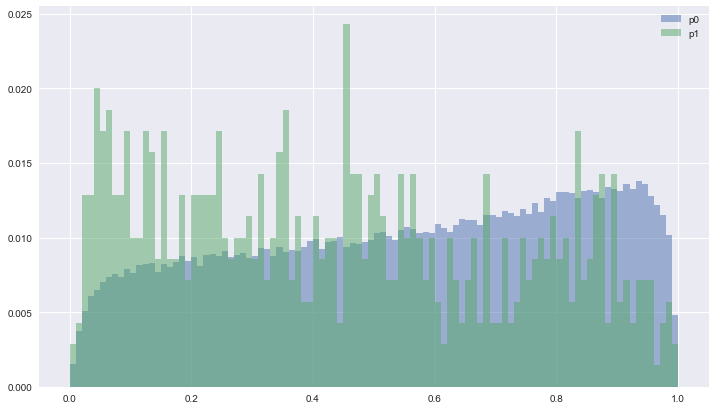

INFO:KDECopulaNNPdf:Maximum weight found: 1.1533211120424893


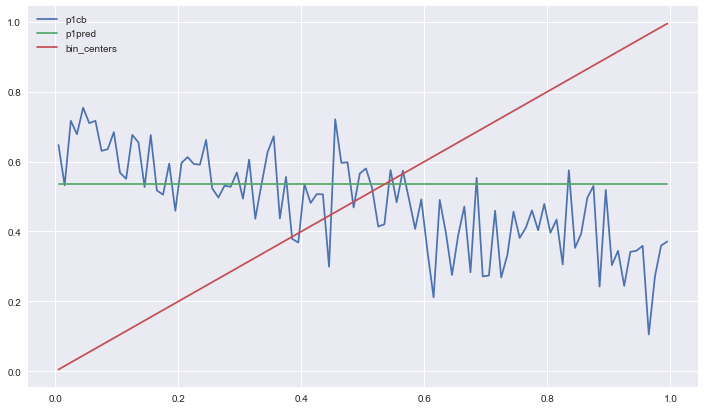

In [45]:
kde._calibrate_classifier(kde.hist_p0_, kde.hist_p1_, kde.bin_edges_, validation_plots=True)

In [47]:
X_gen = kde.sample_no_weights(n_samples=df_num.shape[0])

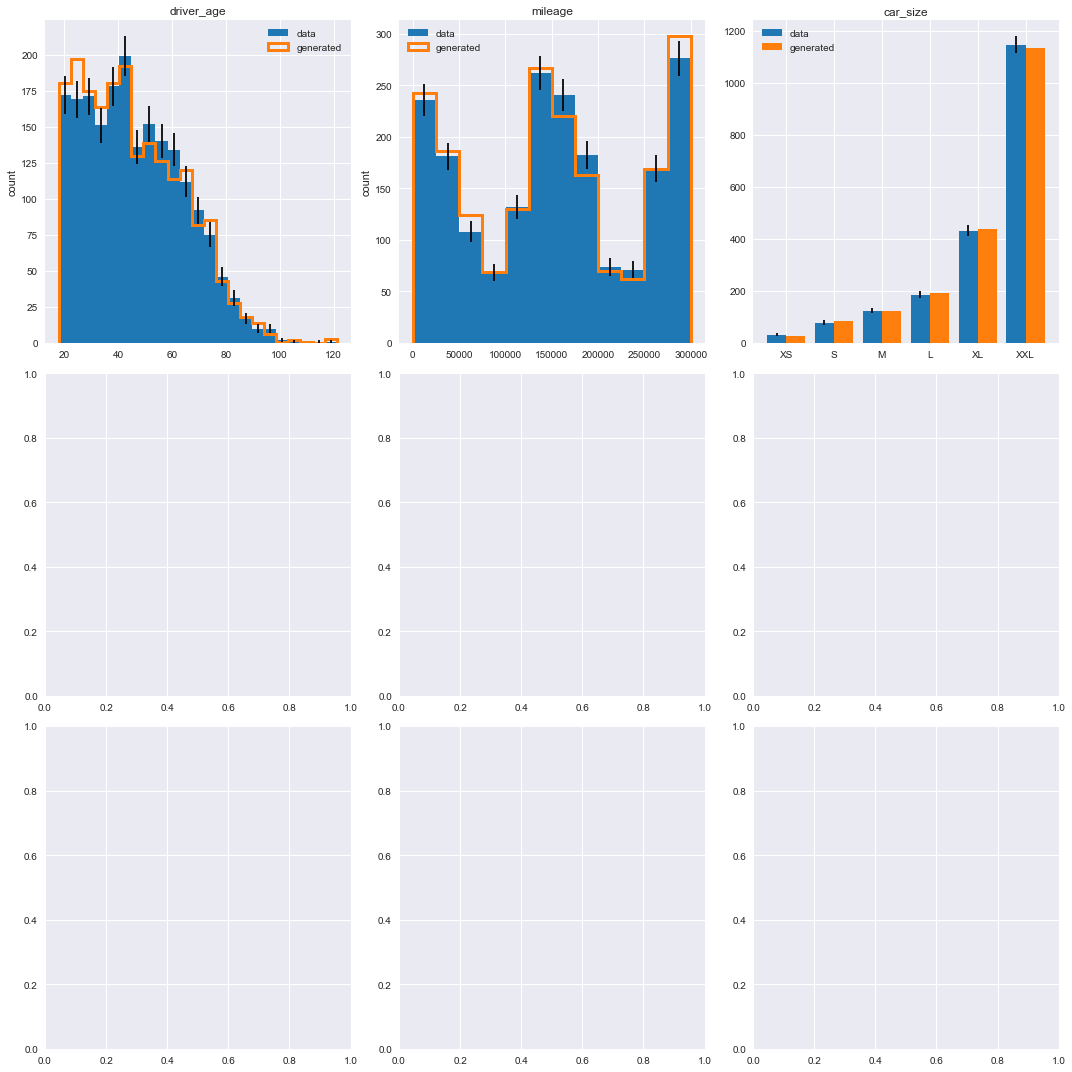

In [22]:
df_gen = pd.DataFrame(X_gen[:, [1, 3, 4]], columns=ss.columns)
df_gen.loc[:, 'car_size'] = df_gen.loc[:, 'car_size'].astype(int)
df_gen = df_gen.replace(rev_size_map)
cat_order = ['XS', 'S', 'M', 'L', 'XL', 'XXL']

i_set = set([i for i in range(M)])
fig, axs = plt.subplots(nrows=M, ncols=M, figsize=(15, 15))
width = 0.4
hw = width / 2
bar_params = dict(
    align='center', ecolor='black', capsize=7
)

for i, c in enumerate(ss.columns):
    if c in num_cols:
        cnt, bins, _ = axs[0, i].hist(ss[c], bins='auto', color=colors[0], label='data')
        #cnt, *_ = axs[0, i].hist(ss[c], bins=bins, histtype='step', lw=3, color=colors[0], label='data')
        ext_cnt = np.insert(cnt, 0, cnt[0])
        centers = 0.5 * (bins[1:] + bins[:-1])
        err = np.sqrt(cnt)
        cnt_gen, *_ = axs[0, i].hist(df_gen[c], bins=bins, histtype='step', lw=3, color=colors[1], label='generated')
        ext_cnt_gen = np.insert(cnt_gen, 0, cnt_gen[0])
        axs[0, i].errorbar(centers, cnt, yerr=err, fmt='none', zorder=19, **bar_params)
        axs[0, i].set_ylabel('count')
    elif c in cat_cols:
        gb = df.groupby(by=c)[c].count().to_frame().rename({c: 'count'}, axis=1).loc[cat_order]
        err = np.sqrt(gb['count'].values)
        gb_gen = df_gen.groupby(by=c)[c].count().to_frame().rename({c: 'count'}, axis=1).loc[cat_order]
        
        axs[0, i].bar(gb.reset_index().index - hw, gb['count'], yerr=err, color=colors[0], label='data', width=width, **bar_params)
        axs[0, i].bar(gb_gen.reset_index().index + hw, gb_gen['count'], color=colors[1], label='generated', width=width, **bar_params)
        axs[0, i].legend()
        axs[0, i].set_xticklabels([0] + cat_order)
        if c in rot_labels:
            axs[0, i].set_xticklabels(gb.index, rotation=20)
    else:
        ValueError('Column not numerical or categorical')
    axs[0, i].legend()
    axs[0, i].set_title(c)
#     ci = 1
#     for cc in ss.columns:
#         if cc == c:
#             continue
#         if (c in cat_cols) or (cc in cat_cols):
#             sns.violinplot(data=df, x=c, y=cc, ax=axs[i, ci], color=colors[0], order=cat_order, saturation=0.3)
#             sns.violinplot(data=df_gen, x=c, y=cc, ax=axs[i, ci], color=colors[1], order=cat_order, alpha=0.3)
#         else:
#             sns.kdeplot(data=df[c], data2=df[cc], ax=axs[i, ci], color=colors[0])
#             sns.kdeplot(data=df_gen[c], data2=df_gen[cc], ax=axs[i, ci], color=colors[1])
#         ci += 1
    
plt.tight_layout()

In [23]:
cols = ['']

In [24]:
ss = df_num.iloc[:, [1, 3, 4]]

In [25]:
ss.columns

Index(['driver_age', 'mileage', 'car_size'], dtype='object')

In [51]:
dataset_name = 'insurance_numerical'

In [48]:
x = 'driver_age'
y = 'mileage'
df_gen = pd.DataFrame(X_gen, columns=df.columns)

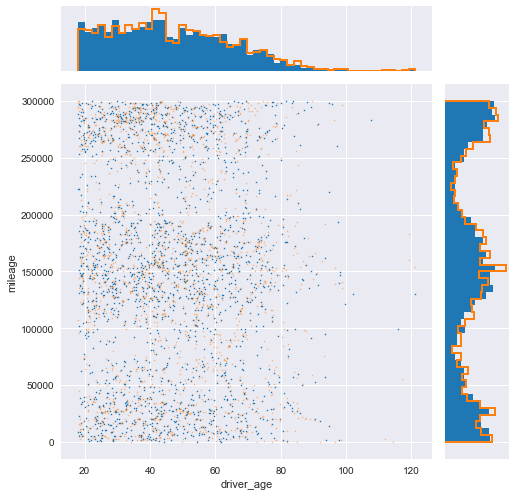

In [53]:
axs = sns.JointGrid(data=df_gen, x=x, y=y, height=7)
axs.ax_joint.scatter(data=df, x=x, y=y, c=colors[0], marker='x', s=0.2)
axs.ax_joint.scatter(data=df_gen, x=x, y=y, c=colors[1], marker='x', s=0.2, alpha=0.5)

cnt, bins, _ = axs.ax_marg_x.hist(df[x], bins=50, color=colors[0])
cnt_gen, *_ = axs.ax_marg_x.hist(df_gen[x], bins=bins, histtype='step', lw=2, color=colors[1])

cnt, bins, _ = axs.ax_marg_y.hist(df[y], bins=50, color=colors[0], orientation='horizontal')
cnt_gen, *_ = axs.ax_marg_y.hist(df_gen[y], bins=bins, histtype='step', lw=2, color=colors[1], orientation='horizontal')
axs.savefig(f'{dataset_name}_joint_marginal_with_sample.png', dpi=300)

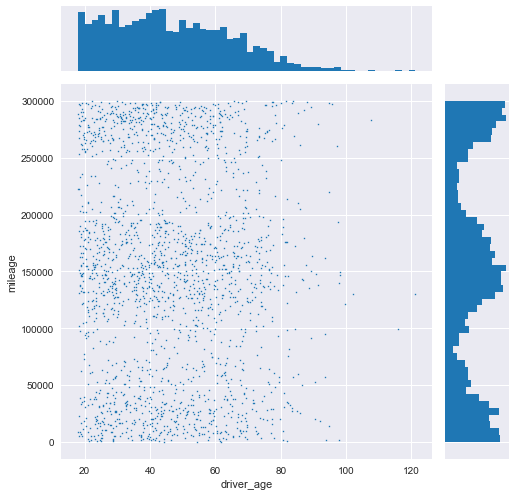

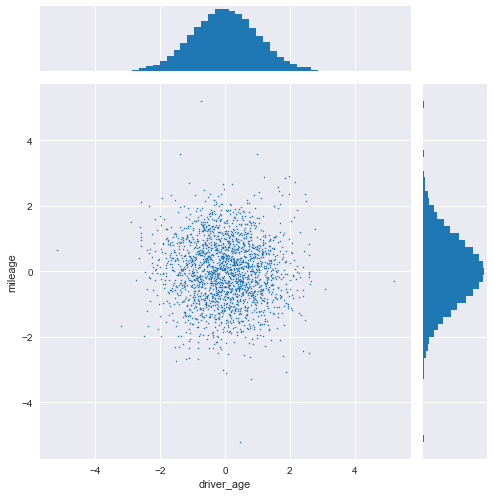

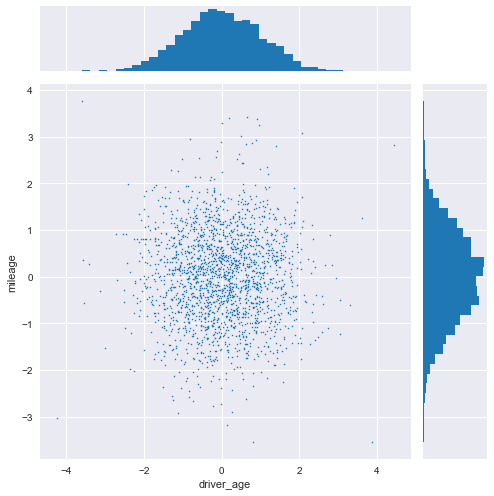

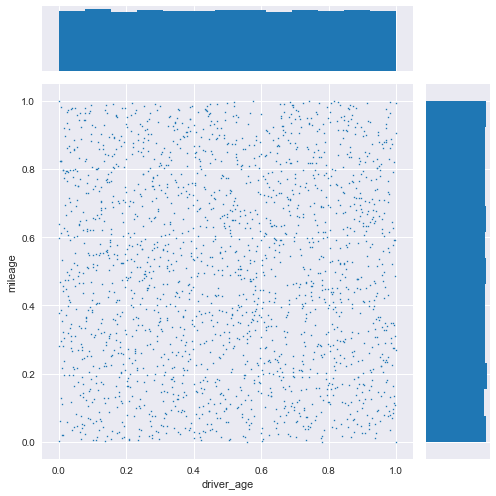

In [27]:
x = 'driver_age'
y = 'mileage'
data = ss[[x, y]]

axs = sns.JointGrid(data=ss, x=x, y=y, height=7)
axs.ax_joint.scatter(data=ss, x=x, y=y, c=colors[0], marker='x', s=0.2)
cnt, bins, _ = axs.ax_marg_x.hist(df[x], bins=50, color=colors[0])
cnt, bins, _ = axs.ax_marg_y.hist(df[y], bins=50, color=colors[0], orientation='horizontal')
axs.savefig(f'{dataset_name}_joint_marginal_data.png', dpi=300)

X_g = kde.pipe_[0].transform(data)
tdf = pd.DataFrame(X_g, columns=[x, y])

axs = sns.JointGrid(data=tdf, x=x, y=y, height=7)
axs.ax_joint.scatter(data=tdf, x=x, y=y, c=colors[0], marker='x', s=0.2)
cnt, bins, _ = axs.ax_marg_x.hist(tdf[x], bins='auto', color=colors[0])
cnt, bins, _ = axs.ax_marg_y.hist(tdf[y], bins='auto', color=colors[0], orientation='horizontal')
axs.savefig(f'{dataset_name}_joint_marginal_quantile.png', dpi=300)

X_p = kde.pipe_[0:2].transform(data)
tdf = pd.DataFrame(X_p, columns=[x, y])

axs = sns.JointGrid(data=tdf, x=x, y=y, height=7)
axs.ax_joint.scatter(data=tdf, x=x, y=y, c=colors[0], marker='x', s=0.2)
cnt, bins, _ = axs.ax_marg_x.hist(tdf[x], bins='auto', color=colors[0])
cnt, bins, _ = axs.ax_marg_y.hist(tdf[y], bins='auto', color=colors[0], orientation='horizontal')
axs.savefig(f'{dataset_name}_joint_marginal_pca.png', dpi=300)

X_u = kde.pipe_.transform(data)
tdf = pd.DataFrame(X_u, columns=[x, y])

axs = sns.JointGrid(data=tdf, x=x, y=y, height=7)
axs.ax_joint.scatter(data=tdf, x=x, y=y, c=colors[0], marker='x', s=0.2)
cnt, bins, _ = axs.ax_marg_x.hist(tdf[x], bins='auto', color=colors[0])
cnt, bins, _ = axs.ax_marg_y.hist(tdf[y], bins='auto', color=colors[0], orientation='horizontal')
axs.savefig(f'{dataset_name}_joint_marginal_uniform.png', dpi=300)